In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df = pd.read_csv(r"/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# checking the duplicated values in data 
df.duplicated().sum()

0

In [5]:
#1 Misssing value
# checking the missing columns values then fill the null values 
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())
df.info()

France
37.0
1.0
1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Visualization

In [6]:
# color patettes
color_1 = sns.color_palette("Accent",10)
color_2 = sns.color_palette("mako_r",10)
color_3 = sns.color_palette("Spectral_r",10)
color_4 = sns.color_palette()

0    7963
1    2037
Name: Exited, dtype: int64


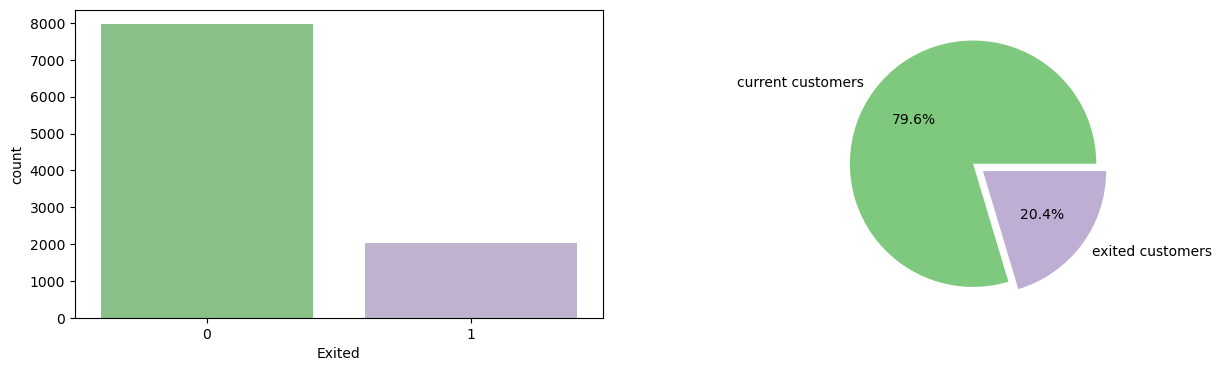

In [7]:
# find the the insight the exited columns and visualization using the countplot for seaborn and pie plot.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(df["Exited"].value_counts(),explode=[0.0,0.1],labels=["current customers","exited customers"],
        colors=color_1,autopct="%.01f%%")
print(df["Exited"].value_counts())

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64


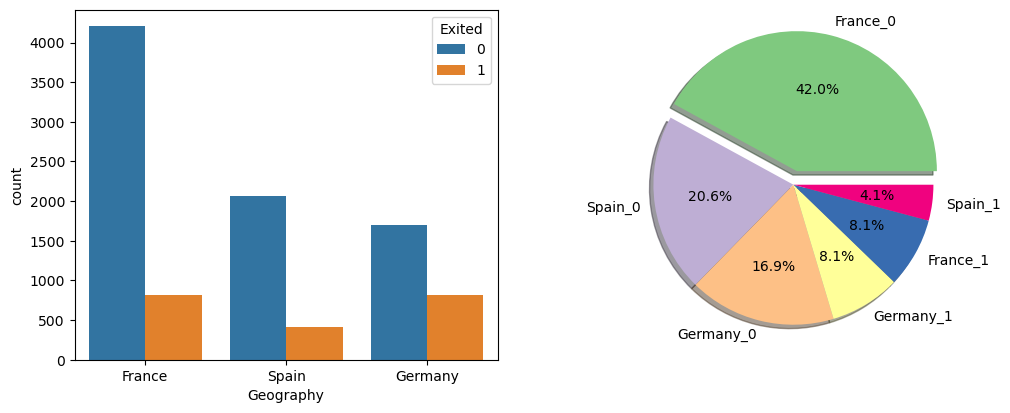

In [8]:
# find the insight and visualation plot wise 

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x="Geography",hue="Exited",palette=color_4)
plt.subplot(2,2,2)
plt.pie(df.Geography.groupby(df.Exited).value_counts(),explode=eplode,shadow=True,colors=color_1,
        labels=label,autopct="%0.1f%%")


print(df.Geography.groupby(df.Exited).value_counts())

> ****Observation**:**

Insight of the Geography column: mostly customer are exited from Germany 8.1% and France 8.1% and Spain 4.1%.

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64


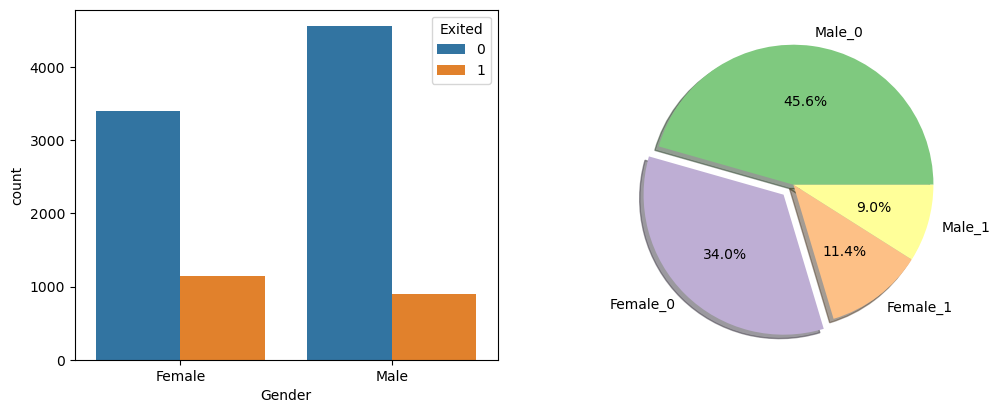

In [9]:
# find the insight and visualation plot wise 

label = ["Male_0","Female_0","Female_1","Male_1"]
eplode = [0.0,0.1,0.0,0.0]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Gender",hue="Exited",palette=color_4)
plt.subplot(2,2,2)
plt.pie(df.Gender.groupby(df.Exited).value_counts(),explode=eplode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")

print(df.Gender.groupby(df.Exited).value_counts())


Insight of the Gender column: mostly female customers are exited around 11.4% and male are exited around 9%.

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64
------------------------------
Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: HasCrCard, dtype: int64
------------------------------
Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64


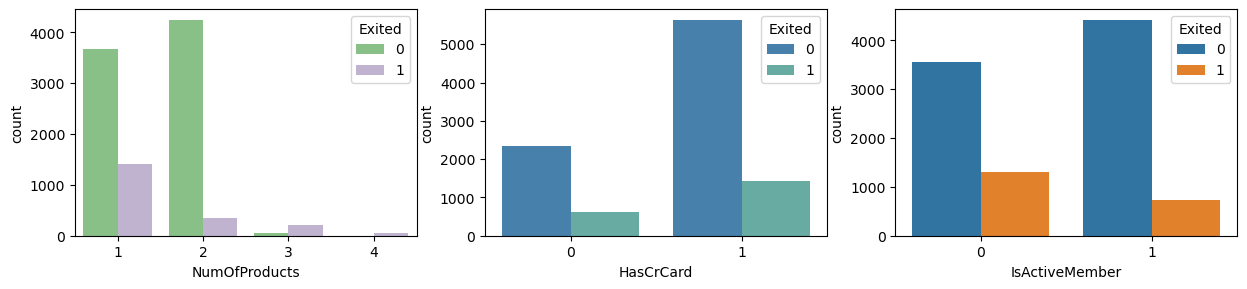

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="NumOfProducts",hue="Exited",palette=color_1)
plt.subplot(3,3,2)
sns.countplot(data=df,x="HasCrCard",hue="Exited",palette=color_3)
plt.subplot(3,3,3)
sns.countplot(data=df,x="IsActiveMember",hue="Exited",palette=color_4)


print(df.NumOfProducts.groupby(df.Exited).value_counts())
print("--"*15)
print(df.HasCrCard.groupby(df.Exited).value_counts())
print("--"*15)
print(df.IsActiveMember.groupby(df.Exited).value_counts())

### Observation:
1. Insight of the NumOfProducts column: most of the 1 NumOfProducts customers are exited around 1409.
2. Insight of the HasCrCard column: most of the 1 HasCrCard customers are exited around 1424.
3. Insight of the IsActiveMember column: mostly 0 number of active member are exited around 1302. 

Exited  CreditScore
0       850            190
        678             50
1       850             43
0       684             43
        655             43
                      ... 
1       404              1
        405              1
        407              1
        408              1
0       405              1
Length: 862, dtype: int64
------------------------------
Exited  Age
0       35     417
        37     416
        38     414
        34     414
        36     403
              ... 
        88       1
        85       1
        84       1
        83       1
1       84       1
Length: 128, dtype: int64


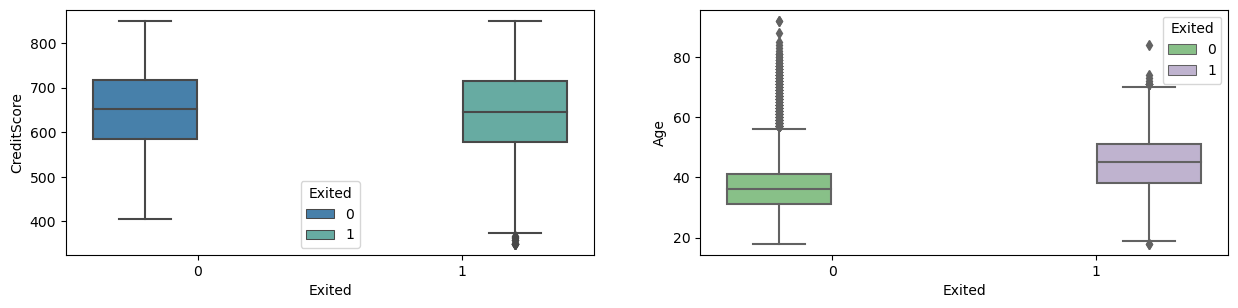

In [11]:

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["CreditScore"],x=df["Exited"],hue=df["Exited"],palette=color_3)
plt.subplot(2,2,2)
sns.boxplot(y=df["Age"],x=df["Exited"],hue=df["Exited"],palette=color_1)

print(df[["Exited","CreditScore"]].value_counts())
print("--"*15)
print(df[["Exited","Age"]].value_counts())

## Data preprocessing:
#### OrdinalEncoder method:

OrdinalEncoder is a preprocessing technique in machine learning that transforms categorical variables into ordinal integers, enabling algorithms to better understand and learn from categorical data

In [12]:
#GEOGRAPHY : FRANCE SPAIN GERMANY
#GENDER: MALE FEMALE
df_new = df.copy()

from sklearn.preprocessing import OrdinalEncoder

a = ["Geography","Gender"] ## select the particalur columns for change the cate to numbric
en_ = OrdinalEncoder()     
df_new[a] = en_.fit_transform(df_new[a])
print(df_new["Geography"])
print(df["Geography"])
print(df_new["Gender"])

0       0.0
1       2.0
2       0.0
3       0.0
4       2.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: Geography, Length: 10000, dtype: float64
0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    0.0
9998    1.0
9999    0.0
Name: Gender, Length: 10000, dtype: float64


In [13]:
# Dropping columns which are not necessary for prediction
df_new = df_new.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [14]:
## select the particalur columns for convert 0 to 1 using feature scaling method by sklearn.
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df_new[b]= mix_scaler.fit_transform(df_new[b])
df_new.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [15]:
x_1 = df_new.iloc[:,:-1]
y_1 = df_new["Exited"]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 6100 to 3392
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   float64
 1   Geography        8000 non-null   float64
 2   Gender           8000 non-null   float64
 3   Age              8000 non-null   float64
 4   Tenure           8000 non-null   float64
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 687.5 KB


In [17]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(x_train,y_train)

SVC(C=150, gamma=0.1, probability=True)

In [18]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(x_train,y_train)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
# SVM with RBF kernel
print(classification_report(y_train,  SVM_RBF.predict(x_train)))
print(classification_report(y_train,  SVM_POL.predict(x_train)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6375
           1       0.81      0.41      0.54      1625

    accuracy                           0.86      8000
   macro avg       0.84      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      6375
           1       0.85      0.24      0.37      1625

    accuracy                           0.84      8000
   macro avg       0.84      0.61      0.64      8000
weighted avg       0.84      0.84      0.80      8000

